In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
#from datetime import datetime
consumption_df = pd.read_csv('Final Datasets/energy_consumption.csv')
consumption_df

,Unnamed: 0,timestamp,energy_kWh,House Number,electronics workbench energy,network equipment energy,home office energy,RAE home office energy,RAE Mobile Phone Charger Energy
0,0,2012-06-01 01:00:00,1.011,1,0.008686,0.019316,0.018232,0.134570,0.000431
1,1,2012-06-01 02:00:00,0.451,1,0.007178,0.019338,0.013745,0.061839,0.000215
2,2,2012-06-01 03:00:00,0.505,1,0.007324,0.019336,0.014177,0.068852,0.000236
3,3,2012-06-01 04:00:00,0.441,1,0.007151,0.019339,0.013664,0.060540,0.000211
4,4,2012-06-01 05:00:00,0.468,1,0.007224,0.019338,0.013881,0.064047,0.000221
...,...,...,...,...,...,...,...,...,...
611013,123761,2020-05-19 19:00:00,3.060,28,0.014204,0.019235,0.034654,0.400690,0.001220
611014,123762,2020-05-19 20:00:00,2.940,28,0.013881,0.019240,0.033692,0.385105,0.001174
611015,123763,2020-05-19 21:00:00,1.970,28,0.011269,0.019278,0.025918,0.259123,0.000800
611016,123764,2020-05-19 22:00:00,2.130,28,0.011700,0.019272,0.027200,0.279904,0.000862


In [2]:
consumption_df = consumption_df[consumption_df['House Number'] == 7]
df = consumption_df.copy()
df

,Unnamed: 0,timestamp,energy_kWh,House Number,electronics workbench energy,network equipment energy,home office energy,RAE home office energy,RAE Mobile Phone Charger Energy
163905,164759,2015-05-30 00:00:00,0.52,7,0.007364,0.019336,0.014298,0.070800,0.000242
163906,164760,2015-05-30 01:00:00,0.47,7,0.007229,0.019337,0.013897,0.064306,0.000222
163907,164761,2015-05-30 02:00:00,0.42,7,0.007095,0.019339,0.013496,0.057813,0.000203
163908,164762,2015-05-30 03:00:00,0.44,7,0.007149,0.019339,0.013656,0.060410,0.000211
163909,164763,2015-05-30 04:00:00,0.44,7,0.007149,0.019339,0.013656,0.060410,0.000211
...,...,...,...,...,...,...,...,...,...
187259,188179,2018-01-29 19:00:00,0.32,7,0.006825,0.019343,0.012695,0.044825,0.000164
187260,188180,2018-01-29 20:00:00,1.15,7,0.009060,0.019311,0.019346,0.152623,0.000484
187261,188181,2018-01-29 21:00:00,1.66,7,0.010434,0.019290,0.023434,0.218861,0.000681
187262,188182,2018-01-29 22:00:00,0.51,7,0.007337,0.019336,0.014217,0.069502,0.000238


In [3]:
train_dates_df = df['timestamp']

In [4]:
train_dates_df

163905    2015-05-30 00:00:00
163906    2015-05-30 01:00:00
163907    2015-05-30 02:00:00
163908    2015-05-30 03:00:00
163909    2015-05-30 04:00:00
                 ...         
187259    2018-01-29 19:00:00
187260    2018-01-29 20:00:00
187261    2018-01-29 21:00:00
187262    2018-01-29 22:00:00
187263    2018-01-29 23:00:00
Name: timestamp, Length: 23359, dtype: object

In [5]:
cols = list(df)[2:]
cols = [cols[0]] + cols[2:]
cols

['energy_kWh',
 'electronics workbench energy',
 'network equipment energy',
 'home office energy',
 'RAE home office energy',
 'RAE Mobile Phone Charger Energy']

In [6]:
df_for_training = df[cols].astype(float)
df_for_training

,energy_kWh,electronics workbench energy,network equipment energy,home office energy,RAE home office energy,RAE Mobile Phone Charger Energy
163905,0.52,0.007364,0.019336,0.014298,0.070800,0.000242
163906,0.47,0.007229,0.019337,0.013897,0.064306,0.000222
163907,0.42,0.007095,0.019339,0.013496,0.057813,0.000203
163908,0.44,0.007149,0.019339,0.013656,0.060410,0.000211
163909,0.44,0.007149,0.019339,0.013656,0.060410,0.000211
...,...,...,...,...,...,...
187259,0.32,0.006825,0.019343,0.012695,0.044825,0.000164
187260,1.15,0.009060,0.019311,0.019346,0.152623,0.000484
187261,1.66,0.010434,0.019290,0.023434,0.218861,0.000681
187262,0.51,0.007337,0.019336,0.014217,0.069502,0.000238


In [7]:
#df_for_training[[ 'electronics workbench energy','network equipment energy', 'home office energy', 'RAE Mobile Phone Charger Energy']].plot.line()

In [8]:
scaler = MinMaxScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)
df_for_training_scaled

array([[0.07365439, 0.07365439, 0.92634561, 0.07365439, 0.07365439,
        0.07365439],
       [0.06657224, 0.06657224, 0.93342776, 0.06657224, 0.06657224,
        0.06657224],
       [0.05949008, 0.05949008, 0.94050992, 0.05949008, 0.05949008,
        0.05949008],
       ...,
       [0.23512748, 0.23512748, 0.76487252, 0.23512748, 0.23512748,
        0.23512748],
       [0.07223796, 0.07223796, 0.92776204, 0.07223796, 0.07223796,
        0.07223796],
       [0.06798867, 0.06798867, 0.93201133, 0.06798867, 0.06798867,
        0.06798867]])

In [9]:
#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features. 
#In this example, the n_features is 5. We will make timesteps = 14 (past days data used for training). 

#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 14  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (23345, 14, 6).
trainY shape == (23345, 1).


In [10]:
trainY

array([[0.0509915 ],
       [0.05240793],
       [0.09206799],
       ...,
       [0.23512748],
       [0.07223796],
       [0.06798867]])

In [11]:
# TODO - Remove redundant values
#trainX

In [12]:
trainX.shape, trainY.shape

((23345, 14, 6), (23345, 1))

In [13]:
trainX[0] # Hour 1 to hour 14  trainY[0] hour 15
trainX[1] # Hour 2 to hour 15 trainY hour 16

array([[0.06657224, 0.06657224, 0.93342776, 0.06657224, 0.06657224,
        0.06657224],
       [0.05949008, 0.05949008, 0.94050992, 0.05949008, 0.05949008,
        0.05949008],
       [0.06232295, 0.06232295, 0.93767705, 0.06232295, 0.06232295,
        0.06232295],
       [0.06232295, 0.06232295, 0.93767705, 0.06232295, 0.06232295,
        0.06232295],
       [0.05807365, 0.05807365, 0.94192635, 0.05807365, 0.05807365,
        0.05807365],
       [0.06232295, 0.06232295, 0.93767705, 0.06232295, 0.06232295,
        0.06232295],
       [0.06090652, 0.06090652, 0.93909348, 0.06090652, 0.06090652,
        0.06090652],
       [0.05807365, 0.05807365, 0.94192635, 0.05807365, 0.05807365,
        0.05807365],
       [0.06373938, 0.06373938, 0.93626062, 0.06373938, 0.06373938,
        0.06373938],
       [0.07790368, 0.07790368, 0.92209632, 0.07790368, 0.07790368,
        0.07790368],
       [0.04957507, 0.04957507, 0.95042493, 0.04957507, 0.04957507,
        0.04957507],
       [0.03966006, 0

In [14]:
trainY[0]

array([0.0509915])

In [15]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 64)            18176     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 30,625
Trainable params: 30,625
Non-trainable params: 0
_________________________________________________________________


Epoch 1/5
1314/1314 [==============================] - 28s 19ms/step - loss: 0.0054 - val_loss: 0.0028
Epoch 2/5
1314/1314 [==============================] - 26s 20ms/step - loss: 0.0047 - val_loss: 0.0026
Epoch 3/5
1314/1314 [==============================] - 27s 20ms/step - loss: 0.0046 - val_loss: 0.0027
Epoch 4/5
1314/1314 [==============================] - 27s 21ms/step - loss: 0.0045 - val_loss: 0.0026
Epoch 5/5
1314/1314 [==============================] - 27s 20ms/step - loss: 0.0045 - val_loss: 0.0025


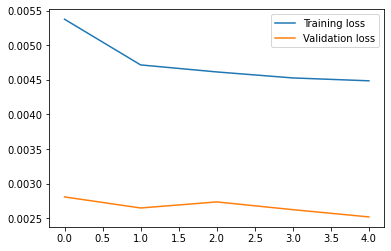

In [16]:
history = model.fit(trainX, trainY, epochs=5, batch_size=16, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [17]:
predicted_values = pd.Series(model.predict(trainX).reshape(1,-1)[0])

In [18]:
y_values = pd.Series(trainY.reshape(1,-1)[0])

In [19]:
std_predictions = model.predict(trainX)
prediction_copies = np.repeat(std_predictions, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]
predicted_values = pd.Series(y_pred_future)
predicted_values

0        0.490024
1        0.439145
2        0.452889
3        0.693384
4        1.097935
           ...   
23340    0.406187
23341    0.404449
23342    0.984030
23343    1.230172
23344    0.641333
Length: 23345, dtype: float32

In [20]:
y_values, std_predictions

(0        0.050992
 1        0.052408
 2        0.092068
 3        0.192635
 4        0.128895
            ...   
 23340    0.045326
 23341    0.162890
 23342    0.235127
 23343    0.072238
 23344    0.067989
 Length: 23345, dtype: float64,
 array([[0.06940844],
        [0.06220183],
        [0.06414857],
        ...,
        [0.13938099],
        [0.17424537],
        [0.09084037]], dtype=float32))

In [21]:
df_for_training.iloc[n_past:]

,energy_kWh,electronics workbench energy,network equipment energy,home office energy,RAE home office energy,RAE Mobile Phone Charger Energy
163919,0.36,0.006933,0.019342,0.013015,0.050020,0.000180
163920,0.37,0.006960,0.019341,0.013095,0.051319,0.000184
163921,0.65,0.007714,0.019330,0.015339,0.087684,0.000292
163922,1.36,0.009626,0.019302,0.021029,0.179898,0.000565
163923,0.91,0.008414,0.019320,0.017423,0.121453,0.000392
...,...,...,...,...,...,...
187259,0.32,0.006825,0.019343,0.012695,0.044825,0.000164
187260,1.15,0.009060,0.019311,0.019346,0.152623,0.000484
187261,1.66,0.010434,0.019290,0.023434,0.218861,0.000681
187262,0.51,0.007337,0.019336,0.014217,0.069502,0.000238


In [22]:
df_for_training = df_for_training.iloc[n_past:]
train_dates_df = train_dates_df.iloc[n_past:]
df_for_training['predicted_energy_kWh'] = y_pred_future

<ipython-input-22-e4cbeca066ac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_training['predicted_energy_kWh'] = y_pred_future


In [38]:
df_for_training[['energy_kWh', 'predicted_energy_kWh']].head(60)

,energy_kWh,predicted_energy_kWh
timestamp,,
2015-05-30 14:00:00,0.36,0.490024
2015-05-30 15:00:00,0.37,0.439145
2015-05-30 16:00:00,0.65,0.452889
2015-05-30 17:00:00,1.36,0.693384
2015-05-30 18:00:00,0.91,1.097935
2015-05-30 19:00:00,0.21,0.861142
2015-05-30 20:00:00,0.22,0.446091
2015-05-30 21:00:00,0.22,0.372494
2015-05-30 22:00:00,0.22,0.340334


In [24]:
generation_df = pd.read_csv('Final Datasets/energy_generation.csv')
# TODO - Move this to energy generation
generation_df['timestamp'] = pd.DatetimeIndex(generation_df['timestamp'])
generation_df = generation_df.resample('H', on='timestamp').sum()
#generation_df.set_index('timestamp', inplace = True)

In [25]:
df_for_training['timestamp'] = train_dates_df
df_for_training.set_index('timestamp', inplace = True)

<ipython-input-25-1553759c6369>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_training['timestamp'] = train_dates_df


In [26]:
df = df_for_training.join(generation_df)
df

,energy_kWh,electronics workbench energy,network equipment energy,home office energy,RAE home office energy,RAE Mobile Phone Charger Energy,predicted_energy_kWh,Wind Energy,Solar Energy,Lat,Long,Place
timestamp,,,,,,,,,,,,
2015-05-30 14:00:00,0.36,0.006933,0.019342,0.013015,0.050020,0.000180,0.490024,0.705326,0.6030,0.0,0.0,0.0
2015-05-30 15:00:00,0.37,0.006960,0.019341,0.013095,0.051319,0.000184,0.439145,0.706550,0.5040,0.0,0.0,0.0
2015-05-30 16:00:00,0.65,0.007714,0.019330,0.015339,0.087684,0.000292,0.452889,0.859516,0.4752,0.0,0.0,0.0
2015-05-30 17:00:00,1.36,0.009626,0.019302,0.021029,0.179898,0.000565,0.693384,1.389610,0.3300,0.0,0.0,0.0
2015-05-30 18:00:00,0.91,0.008414,0.019320,0.017423,0.121453,0.000392,1.097935,1.625664,0.1530,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-29 19:00:00,0.32,0.006825,0.019343,0.012695,0.044825,0.000164,0.406187,5.451629,0.0000,0.0,0.0,0.0
2018-01-29 20:00:00,1.15,0.009060,0.019311,0.019346,0.152623,0.000484,0.404449,2.574970,0.0000,0.0,0.0,0.0
2018-01-29 21:00:00,1.66,0.010434,0.019290,0.023434,0.218861,0.000681,0.984030,1.103182,0.0000,0.0,0.0,0.0


In [45]:
df['Total Generated Energy'] = df['Wind Energy']+df['Solar Energy']
df['Predicted Energy Deficit'] = df['Total Generated Energy'] - df['predicted_energy_kWh']
df['Energy Deficit Flag'] = df['Predicted Energy Deficit'].apply(lambda x: False if x>0 else x)
df[df['Energy Deficit Flag'] != False].head(60)

,energy_kWh,electronics workbench energy,network equipment energy,home office energy,RAE home office energy,RAE Mobile Phone Charger Energy,predicted_energy_kWh,Wind Energy,Solar Energy,Lat,Long,Place,Total Generated Energy,Predicted Energy Deficit,Energy Deficit Flag,Energy Consumption Error,Anomaly detected
timestamp,,,,,,,,,,,,,,,,,
2015-05-31 05:00:00,0.29,0.006745,0.019345,0.012454,0.040928,0.000153,0.389722,0.106915,0.0342,0.0,0.0,0.0,0.141115,-0.248607,-0.248607,-0.099722,False
2015-05-31 06:00:00,0.32,0.006825,0.019343,0.012695,0.044825,0.000164,0.411111,0.011215,0.0912,0.0,0.0,0.0,0.102415,-0.308696,-0.308696,-0.091111,False
2015-05-31 07:00:00,0.24,0.006610,0.019347,0.012054,0.034434,0.000134,0.426165,0.037717,0.3558,0.0,0.0,0.0,0.393517,-0.032648,-0.0326481,-0.186165,False
2015-05-31 21:00:00,4.67,0.018539,0.019171,0.047557,0.609794,0.001841,1.931342,1.645416,0.0000,0.0,0.0,0.0,1.645416,-0.285926,-0.285926,2.738658,2.73866
2015-05-31 22:00:00,1.72,0.010595,0.019288,0.023915,0.226654,0.000704,1.919587,1.411768,0.0000,0.0,0.0,0.0,1.411768,-0.507819,-0.507819,-0.199587,False
2015-06-01 13:00:00,0.27,0.006691,0.019345,0.012294,0.038331,0.000145,0.833021,0.391812,0.2196,0.0,0.0,0.0,0.611412,-0.221609,-0.221609,-0.563021,False
2015-06-01 14:00:00,0.23,0.006583,0.019347,0.011973,0.033136,0.000130,0.450770,0.132473,0.2442,0.0,0.0,0.0,0.376673,-0.074097,-0.0740966,-0.220770,False
2015-06-01 16:00:00,0.41,0.007068,0.019340,0.013416,0.056514,0.000199,0.370936,0.063850,0.1710,0.0,0.0,0.0,0.234850,-0.136086,-0.136086,0.039064,False
2015-06-01 17:00:00,2.19,0.011861,0.019269,0.027681,0.287696,0.000885,0.480025,0.037983,0.0816,0.0,0.0,0.0,0.119583,-0.360442,-0.360442,1.709975,1.70998


In [28]:
energy_stddev = df['energy_kWh'].std()

In [29]:
energy_stddev

0.5485606608319804

In [30]:
df['energy_kWh'].mean()

0.6403563932319554

In [31]:
df['Energy Consumption Error'] = df['energy_kWh'] - df['predicted_energy_kWh']
df['Anomaly detected'] = df['Energy Consumption Error'].apply(lambda x: False if abs(x) < 1.5*energy_stddev else x)

In [32]:
df

,energy_kWh,electronics workbench energy,network equipment energy,home office energy,RAE home office energy,RAE Mobile Phone Charger Energy,predicted_energy_kWh,Wind Energy,Solar Energy,Lat,Long,Place,Total Generated Energy,Predicted Energy Deficit,Energy Deficit Flag,Energy Consumption Error,Anomaly detected
timestamp,,,,,,,,,,,,,,,,,
2015-05-30 14:00:00,0.36,0.006933,0.019342,0.013015,0.050020,0.000180,0.490024,0.705326,0.6030,0.0,0.0,0.0,1.308326,0.818303,False,-0.130024,False
2015-05-30 15:00:00,0.37,0.006960,0.019341,0.013095,0.051319,0.000184,0.439145,0.706550,0.5040,0.0,0.0,0.0,1.210550,0.771405,False,-0.069145,False
2015-05-30 16:00:00,0.65,0.007714,0.019330,0.015339,0.087684,0.000292,0.452889,0.859516,0.4752,0.0,0.0,0.0,1.334716,0.881827,False,0.197111,False
2015-05-30 17:00:00,1.36,0.009626,0.019302,0.021029,0.179898,0.000565,0.693384,1.389610,0.3300,0.0,0.0,0.0,1.719610,1.026226,False,0.666616,False
2015-05-30 18:00:00,0.91,0.008414,0.019320,0.017423,0.121453,0.000392,1.097935,1.625664,0.1530,0.0,0.0,0.0,1.778664,0.680729,False,-0.187935,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-29 19:00:00,0.32,0.006825,0.019343,0.012695,0.044825,0.000164,0.406187,5.451629,0.0000,0.0,0.0,0.0,5.451629,5.045442,False,-0.086187,False
2018-01-29 20:00:00,1.15,0.009060,0.019311,0.019346,0.152623,0.000484,0.404449,2.574970,0.0000,0.0,0.0,0.0,2.574970,2.170521,False,0.745551,False
2018-01-29 21:00:00,1.66,0.010434,0.019290,0.023434,0.218861,0.000681,0.984030,1.103182,0.0000,0.0,0.0,0.0,1.103182,0.119152,False,0.675970,False
